In [36]:
function gradient_descent(a::Float64, s::Float64, ϵ::Float64,
    M::Int64  , x::Vector{Float64}, flag::Bool)
    k     = 0; # COUNTER
    f, ∇f = cost_function(x, 1.0, true);
    println(f);
    println(∇f);
    μ     = infty_norm(∇f);
    x_ant = 0;
    ∇f_ant= 0;

    while( (μ >= ϵ) && (k < M) )
        t_k = 1;
        if( flag == true && k != 0)
            t_k = norm(x - x_ant, 2) / norm(∇f - ∇f_ant, 2);
        end

        armijo = a * dot(∇f, ∇f);
        while( cost_function(x - t_k * ∇f, 1.0, true) > (f - t_k*armijo) )
            t_k = s * t_k;
        end

        x_ant  = x;
        ∇f_ant = ∇f;
        x      = x - t_k * ∇f;
        f, ∇f  = cost_function(x, 1.0, true);
        μ      = infty_norm(∇f);
        k      += 1;
    end

    return x;
end

gradient_descent (generic function with 1 method)

In [29]:
function cost_function( vector::Vector{Float64}, k::Float64, flag::Bool )
    x₀ = vector[1];
    y₀ = vector[2];
    R  = vector[3];
    N  = length(x₀);
    cost   = 0.0;
    g_cost = zeros(3,1);
    if(flag)
        for i in eachindex(u₁)
            aux1 = (u₁[i] - x₀);
            aux_grad1 = aux1;
            aux1 *= aux1;
            aux1 *= k;
            aux2 = (u₂[i] - y₀);
            aux_grad2 = aux2;
            aux2 *= aux2;
            aux2 *= k;
            aux3 = k*R*R;
            b = aux1 + aux2 - aux3;
            
            aux = tanh(b);
            sqr = aux - w[i];
            sqr = sqr*sqr;
            cost += sqr;
            
            scalar_aux = aux*aux - 1;
            scalar_aux *= -1;
            scalar = -( sqr / scalar_aux )
            g_cost[1] = g_cost[1] + scalar*aux_grad1;
            g_cost[2] = g_cost[2] + scalar*aux_grad2;
            g_cost[3] = g_cost[3] + scalar*R;
        end
        
        cost *= 1 / (2N);
        g_cost[1] *= (2k)/N;
        g_cost[2] *= (2k)/N;
        g_cost[3] *= (2k)/N;
        
        return cost, g_cost;
    else
        for i in eachindex(u₁)
            aux1 = (u₁[i] - x₀);
            aux_grad1 = aux1;
            aux1 *= aux1;
            aux1 *= k;
            aux2 = (u₂[i] - y₀);
            aux_grad2 = aux2;
            aux2 *= aux2;
            aux2 *= k;
            aux3 = k*R*R;
            b = aux1 + aux2 - aux3;
            
            aux = tanh(b);
            sqr = aux - w[i];
            sqr = sqr*sqr;
            cost += sqr;
        end
        
        cost *= 1 / (2N);
        return cost;
    end
end

cost_function (generic function with 2 methods)

In [1]:
using LinearAlgebra
using Plots

In [2]:
global u₁, u₂, w;
u₁ = Vector{Float64}();
u₂ = Vector{Float64}();
w  = Vector{Float64}();

file_path = "circulo_treina"
file      = open(file_path)
for line in eachline(file)
    row   = parse.(Float64, split(line));
    push!(u₁, row[1]);
    push!(u₂, row[2]);
    push!(w , row[3]);
end

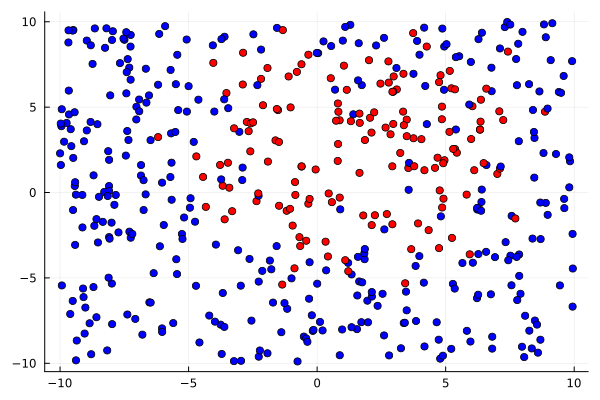

In [3]:
colors = ifelse.( w .== 1, "blue", "red");
plt    = scatter!(u₁, u₂, color = colors, legend = false);
plt

In [4]:
function infty_norm(x)
    max = 0;
    for i in eachindex(x)
        if( max < abs(x[i]) )
            max = abs(x[i]);
        end
    end

    return max;
end

infty_norm (generic function with 1 method)

In [5]:
function teste_cost_function( vector::Vector{Float64}, k::Float64, flag::Bool )
    N = length(u₁);
    # println(N);
    cost = 0.0;
    g_cost = [0.0; 0.0; 0.0];
    x0 = vector[1];
    y0 = vector[2];
    R  = vector[3];
    
    if(flag)
        for i = 1:N
            # println(i);
            b = k*(u₁[i] - x0)^2 + k*(u₂[i] - y0)^2 - k*R^2;
            cost += ( tanh(b) - w[i] )^2
            scalar = (w[i] - tanh(b)) * (1.0 - (tanh(b))^2);
            # println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%");
            # println(w[i]);
            # println(tanh(b));
            # println(scalar);
            # println(b);
            # println("%%%%%%%%%%%%%%%%%%%%%%%%%%%%");
            g_cost[1] += scalar*(u₁[i] - x0);
            g_cost[2] += scalar*(u₂[i] - y0);
            g_cost[3] += scalar*R;
            # println("############################");
            # println(cost);
            # println(g_cost);
            # println(u₁[i]);
            # println(u₂[i]);
            # println(w[i]);
            # println("############################");
        end
        
        cost *= 1.0 / ( 2.0 * N );
        g_cost .* ( 2.0 * k / N );
        
        return cost, g_cost;
    else
        for i = 1:N
            b = k*(u₁[i] - x0)^2 + k*(u₂[i] - y0)^2 - k*R^2;
            cost += ( tanh(b) - w[i] )^2
        end
        
        cost *= 1.0 /(2.0 * N);
        return cost;
    end
end

teste_cost_function (generic function with 1 method)

In [6]:
global points
points = Matrix{Float64}(undef, 30, 1);

In [7]:
function teste_gradient_descent(a::Float64, s::Float64, ϵ::Float64,
    M::Int64  , x::Vector{Float64}, flag::Bool)
    k     = 0; # COUNTER
    f, ∇f = teste_cost_function(x, 1.0, true);
    μ     = infty_norm(∇f);
    x_ant = 0;
    ∇f_ant= 0;

    while( (μ >= ϵ) && (k < M) )
        t_k = 1;
        if( flag == true && k != 0)
            t_k = norm(x - x_ant, 2) / norm(∇f - ∇f_ant, 2);
        end

        armijo = a * dot(∇f, ∇f);
        while( teste_cost_function(x - t_k * ∇f, 1.0, false) > (f - t_k*armijo) )
            t_k = s * t_k;
        end

        x_ant  = x;
        ∇f_ant = ∇f;
        x      = x - t_k * ∇f;
        f, ∇f  = teste_cost_function(x, 1.0, true);
        μ      = infty_norm(∇f);
        k      += 1;
        points[k] = μ;
    end

    return x;
end

teste_gradient_descent (generic function with 1 method)

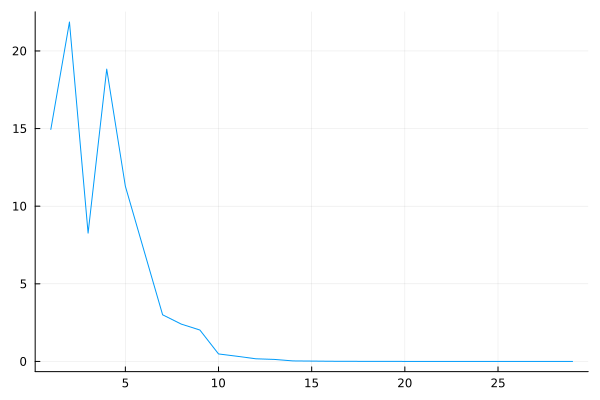

In [16]:
lines_plot = plot(legend=false)
k = 1  # Inicialize k fora do loop
x_values = Int[]
y_values = Float64[]

for i in eachindex(points)
    if points[i] != 0
        push!(x_values, k)
        push!(y_values, points[i])
        k += 1  # Incremente k para a próxima iteração
    end
end

plot!(x_values, y_values, seriestype=:line)


In [9]:
y_values

10-element Vector{Float64}:
 6.90914700975994e-310
 6.9091444587069e-310
 6.90914700976627e-310
 6.9091444587069e-310
 6.90914700976943e-310
 6.9091444587069e-310
 6.90914563339187e-310
 6.9091444587069e-310
 6.9091456333958e-310
 6.9091444587069e-310

In [10]:
a = 10e-4;
s = 0.5  ;
ϵ = 1e-5 ;
M = 1000 ;
x = [0.0; 0.0; 2.0];
x_final = teste_gradient_descent(a, s, ϵ, M, x, false);

In [11]:
x_final

3-element Vector{Float64}:
 1.4816999944346674
 2.0792411992946813
 6.2776072190337295

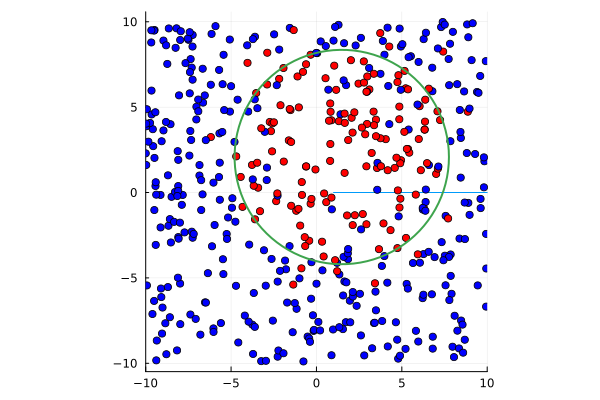

In [12]:
colors = ifelse.( w .== 1, "blue", "red");
plt    = scatter!(u₁, u₂, color = colors, legend = false);
R = x_final[3];
x0 = x_final[1];
y0 = x_final[2];

angles = LinRange(0, 2π, 100);
x_circle = x0 .+ R * cos.(angles);
y_circle = y0 .+ R * sin.(angles);
plt    = plot!(x_circle, y_circle,linewidth=2, aspect_ratio = 1, legend = false, xlims=(-10,10))

In [13]:
function circle_with_parameters( parameters::Vector{Float64}, input::Vector{Float64} )
    x = input[1];
    y = input[2];
    aux1 = ( x - parameters[1] )^2 + ( y - parameters[2] )^2;
    aux2 = parameters[3] * parameters[3];
    if( aux1 > aux2 )
        return 1;
    else
        return -1;
    end
end

circle_with_parameters (generic function with 1 method)

In [14]:
function define_expected_marker( parameters::Vector{Float64} )
    # markers will indicate wich expected points are wrong.
    # 1 - Expected = Real;
    # -1 - Expected != Real
    markers = Int64[];
    for i in eachindex( u₁ )
        expected_value = circle_with_parameters( parameters, [ u₁[i]; u₂[i] ] );
        if( expected_value != w[i] )
            push!(markers, -1.0);
        else
            push!(markers, 1.0);
        end
    end
    
    return markers;
end

define_expected_marker (generic function with 1 method)

In [15]:
markers = define_expected_marker( x_final )

500-element Vector{Int64}:
 -1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
  1
  1
 -1
 -1
  1
  1
  1
  1
  1
  1
  1
  1

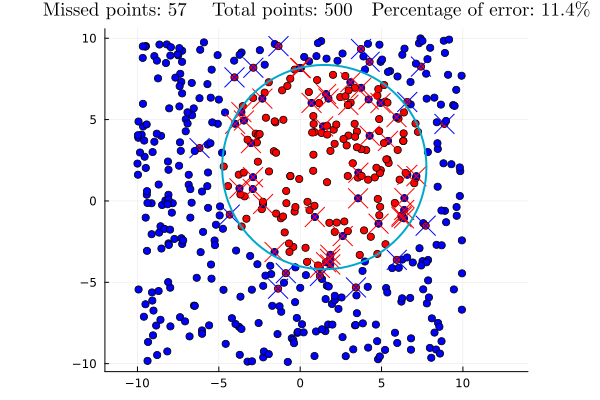

In [39]:
colors = ifelse.( w .== 1, "blue", "red");
plt    = scatter(u₁, u₂, color = colors, legend = false);
total  = 0;
errors = 0;
for i in eachindex( u₁ )
    if( markers[i] == -1 )
        if( w[i] == -1 )
            expected_color = "blue";
        else
            expected_color = "red";
        end
        scatter!( [u₁[i]], [u₂[i]], color = expected_color,
                  markersize = 10, markershape=:xcross, legend = false );
        errors = errors + 1;
    end
    
    total = total + 1;
end

percentage_error = ( errors / total ) * 100;
percentage_error = round( percentage_error, digits = 3 );
title!( "Missed points: $errors    Total points: $total   Percentage of error: $percentage_error%",
        titlefont = font(12, "Computer Modern"));

R = x_final[3];
x0 = x_final[1];
y0 = x_final[2];

angles = LinRange(0, 2π, 100);
x_circle = x0 .+ R * cos.(angles);
y_circle = y0 .+ R * sin.(angles);
plt    = plot!(x_circle, y_circle,linewidth=2, aspect_ratio = 1, legend = false, xlims=(-12,14))